# Group 3 - Assignment 4

Hooshyar Hosna, Lima Rachel, Lorefice Alessandra

## Libraries

In [1]:
import networkx as nx
import numpy as np
import operator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Documents opening

In [2]:
#read the document of edges and create a dictionary with the following format:
#dic = {node_0 : {'Degree': d, 'Destinations':[]}, node_1 : ... }

edges = dict()
doc_edges = open('example_arcs').read().split('\n')

for i in range(len(doc_edges)-1):
    edge = doc_edges[i].split('\t')
    
    edge[0] = int(edge[0])
    edge[1] = int(edge[1])
    
    if edge[0] not in edges.keys():
        edges[edge[0]] = {"Degree": 1, "Destinations": [edge[1]]}
    else:
        edges[edge[0]]["Degree"] +=1
        edges[edge[0]]["Destinations"].append(edge[1])     

In [3]:
#print the table built as in slide 48

for key, values in edges.items():
    print("Node: %i"%key)
    print("Values:")
    print(values)
    print('-----------------------------------------------------------------------')

Node: 7
Values:
{'Degree': 10, 'Destinations': [5, 6, 8, 9, 10, 12, 26, 57, 70, 82]}
-----------------------------------------------------------------------
Node: 9
Values:
{'Degree': 25, 'Destinations': [2, 5, 6, 7, 8, 10, 11, 12, 13, 17, 21, 27, 35, 38, 41, 42, 52, 70, 82, 83, 84, 92, 97, 103, 104]}
-----------------------------------------------------------------------
Node: 10
Values:
{'Degree': 16, 'Destinations': [3, 4, 5, 6, 7, 8, 9, 12, 18, 26, 28, 53, 56, 63, 70, 82]}
-----------------------------------------------------------------------
Node: 15
Values:
{'Degree': 1, 'Destinations': [102]}
-----------------------------------------------------------------------
Node: 20
Values:
{'Degree': 1, 'Destinations': [88]}
-----------------------------------------------------------------------
Node: 22
Values:
{'Degree': 2, 'Destinations': [25, 74]}
-----------------------------------------------------------------------
Node: 24
Values:
{'Degree': 1, 'Destinations': [25]}
-------------

In [4]:
#read the document of indexes and build a dictionary
nodes = dict()
doc_nodes = open('example_index').read().split('\n')

for i in range(len(doc_nodes)-1):
    node = doc_nodes[i].split('\t')
    nodes[int(node[1])] = node[0]

In [5]:
nodes

{0: '1000notes.com',
 1: '100500.tv',
 2: 'abebooks.com',
 3: 'abebooks.de',
 4: 'amazon-presse.de',
 5: 'amazon.ca',
 6: 'amazon.cn',
 7: 'amazon.co.jp',
 8: 'amazon.co.uk',
 9: 'amazon.com',
 10: 'amazon.de',
 11: 'amazon.es',
 12: 'amazon.fr',
 13: 'amazon.it',
 14: 'angrybirds.com',
 15: 'animationplayhouse.com',
 16: 'apple.com',
 17: 'audible.com',
 18: 'audible.de',
 19: 'automattic.com',
 20: 'azspot.net',
 21: 'beautybar.com',
 22: 'blogalaxia.com',
 23: 'blogg.se',
 24: 'blogia.com',
 25: 'blogspot.com',
 26: 'bookdepository.co.uk',
 27: 'bookdepository.com',
 28: 'buyvip.com',
 29: 'canalblog.com',
 30: 'carambatv.ru',
 31: 'classicalvalues.com',
 32: 'creativecommons.org',
 33: 'cubicle17.com',
 34: 'cyprien.fr',
 35: 'diapers.com',
 36: 'disqus.com',
 37: 'downthisvideo.com',
 38: 'dpreview.com',
 39: 'drdrum.com',
 40: 'eltangoysusinvitados.com',
 41: 'endless.com',
 42: 'fabric.com',
 43: 'facebook.com',
 44: 'flickr.com',
 45: 'flickr.net',
 46: 'gmpg.org',
 47: 'goodre

## Page Ranking: *networkx*

In [6]:
def printRanking(nodes, score):

    ''' 
    Given a dictionary of nodes ({"website1" node_1, "website2": node2, ...})
    prints the ranking of the nodes according to the array of scores
    
    '''
    
    pagerank = dict()
    
    for node in nodes.keys():
        pagerank[nodes[node]] = score[node]
    
    pagerank = sorted(pagerank.items(),key=operator.itemgetter(1),reverse=True)
    
    i = 1
    for node, score in pagerank:
        print("%i : %s --> %f"%(i, node, score))
        print("-----------------------------")
        i += 1

In [7]:
G = nx.read_edgelist("example_arcs", create_using=nx.DiGraph())

In [8]:
pr=nx.pagerank(G,0.85)

In [9]:
scores = np.full(shape=len(nodes.keys()), fill_value=0.0)

for node_id in pr.keys():
    scores[int(node_id)] = pr[node_id]

printRanking(nodes, scores)

1 : blogspot.com --> 0.085424
-----------------------------
2 : creativecommons.org --> 0.024220
-----------------------------
3 : wikipedia.org --> 0.021583
-----------------------------
4 : canalblog.com --> 0.017731
-----------------------------
5 : youtube.com --> 0.016119
-----------------------------
6 : google.com --> 0.015904
-----------------------------
7 : tumblr.com --> 0.015904
-----------------------------
8 : wikimedia.org --> 0.015600
-----------------------------
9 : rea-group.com --> 0.015058
-----------------------------
10 : yahoo.com --> 0.013151
-----------------------------
11 : lockerz.com --> 0.012801
-----------------------------
12 : wordpress.com --> 0.012604
-----------------------------
13 : flickr.com --> 0.012587
-----------------------------
14 : dpreview.com --> 0.012143
-----------------------------
15 : apple.com --> 0.010850
-----------------------------
16 : twitter.com --> 0.010656
-----------------------------
17 : typepad.com --> 0.010656
------

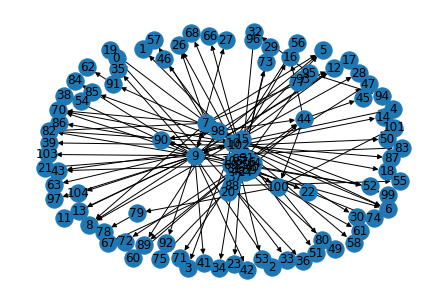

<Figure size 80000x80000 with 0 Axes>

In [10]:
nx.draw(G, with_labels=True)
figure(figsize=(1000, 1000), dpi=80);
#plt.draw()

## Page Ranking: Matrix

For a better understanding we decided to implement the ranking also using the adjaciency matrix A. Two different functions were implemented: the first one creates the matrix without caring about dead ends while the second one affords also that problem. In the ranking we don't see any differences but the scores. Indeed, if dead ends are not considered, all the scores will converges to 0.

In [11]:
def findDeadEnds(edges):

    dead_ends = set()
    
    for node in edges.keys():
        for dest_j in edges[node]['Destinations']:
            if dest_j not in edges.keys():
                dead_ends.add(dest_j)
            
    dead_ends = list(dead_ends)
    
    return dead_ends

In [12]:
def createMatrix(nodes, edges, beta=0.85):
    
    '''
    Given a graph of websites it creates the adjaciency matrix dealing just
    with spidertraps
    
    '''
    
    N = len(nodes.keys())
    A = np.full(shape=(N,N) , fill_value=((1.0-beta)/N))
    
    for node in edges.keys():
        for dest_j in edges[node]['Destinations']:
            
            A[node, dest_j] += beta/edges[node]["Degree"]
                                 
    return A

In [13]:
def createMatrixWithDeadEnds(nodes, edges, beta=0.85):

    '''
    Given a graph of websites it creates the adjaciency matrix dealing
    with spidertraps and dead ends
    
    '''
    
    N = len(nodes.keys())
    A = np.full(shape=(N,N) , fill_value=((1.0-beta)/N))
    
    for node in edges.keys():
        for dest_j in edges[node]['Destinations']:
            
            A[node, dest_j] += beta/edges[node]["Degree"]
            
    dead_ends = findDeadEnds(edges)
    
    for dead_end in dead_ends:
        for node in nodes.keys():
            A[dead_end, node] += beta/N
            
            
    return A
            

In [14]:
def PageRankWithMatrix(nodes, edges, A, beta=0.85, threshold=1.0e-6, max_iterations=100):

    '''
    Given a dictionary of nodes, a dictionary of edges of the form: 
    edges = {node_i : {'Degree': d, 'Destinations':[]}, node_j : ... } 
    the parameter beta, the adjaciency matrix A, the threshold of errors tol and the maximum
    number of iteration to be done max_iterations, returns the ranking of the nodes

    '''
    
    N = len(nodes.keys())
    
    #initialize r_old 
    r_old = np.full(shape=N , fill_value=1.0/N)

    for _ in range (max_iterations):
        
        r_new = np.dot(r_old, A)
        
        #check if the error is small enough 
        err = sum(abs(r_new - r_old))
        
        if err < N*threshold:
            return r_new
        else:
            #update r_old 
            r_old = r_new.copy()
            
         
    return r_new
    

In [15]:
print("Ranking")
print("")
A = createMatrix(nodes, edges)
scores = PageRankWithMatrix(nodes, edges, A)
printRanking(nodes, scores)

Ranking

1 : blogspot.com --> 0.000006
-----------------------------
2 : creativecommons.org --> 0.000002
-----------------------------
3 : canalblog.com --> 0.000002
-----------------------------
4 : rea-group.com --> 0.000002
-----------------------------
5 : wikipedia.org --> 0.000001
-----------------------------
6 : wikimedia.org --> 0.000001
-----------------------------
7 : yahoo.com --> 0.000001
-----------------------------
8 : wordpress.com --> 0.000001
-----------------------------
9 : youtube.com --> 0.000001
-----------------------------
10 : flickr.com --> 0.000001
-----------------------------
11 : google.com --> 0.000001
-----------------------------
12 : tumblr.com --> 0.000001
-----------------------------
13 : apple.com --> 0.000001
-----------------------------
14 : realestate.com.au --> 0.000001
-----------------------------
15 : rivals.com --> 0.000001
-----------------------------
16 : yahoo.com.au --> 0.000001
-----------------------------
17 : twitter.com --> 0

In [16]:
print("Ranking")
print("")
A = createMatrixWithDeadEnds(nodes, edges)
scores = PageRankWithMatrix(nodes, edges, A)
printRanking(nodes, scores)

Ranking

1 : blogspot.com --> 0.085424
-----------------------------
2 : creativecommons.org --> 0.024220
-----------------------------
3 : wikipedia.org --> 0.021583
-----------------------------
4 : canalblog.com --> 0.017731
-----------------------------
5 : youtube.com --> 0.016119
-----------------------------
6 : google.com --> 0.015904
-----------------------------
7 : tumblr.com --> 0.015904
-----------------------------
8 : wikimedia.org --> 0.015600
-----------------------------
9 : rea-group.com --> 0.015058
-----------------------------
10 : yahoo.com --> 0.013151
-----------------------------
11 : lockerz.com --> 0.012801
-----------------------------
12 : wordpress.com --> 0.012604
-----------------------------
13 : flickr.com --> 0.012587
-----------------------------
14 : dpreview.com --> 0.012143
-----------------------------
15 : apple.com --> 0.010850
-----------------------------
16 : twitter.com --> 0.010656
-----------------------------
17 : typepad.com --> 0.0106

## Page Ranking: No Matrix

Here comes the real problem of this assignment. Below three different ways of computing the ranking are described:
- PageRank computes the ranking without considering dead ends; this means that the rows of the sparse matrix does not sum to 1. However, as said before, the ranking remains the same.
- PageRank2 uses the description of https://snap-stanford.github.io/cs224w-notes/network-methods/pagerank. This method considers the scoring that is been lost because of dead ends (that is 1-sum(r_new)) and divide this quantity to all the nodes.
- PageRank3 uses the method of *networkx* by computing the sums of dead ends' scores.

All this methods were implemented because, at the beginning, it was difficult to understand how implement dead ends in the sparse matrix.

In [17]:
def PageRank(nodes, edges, beta=0.85, threshold=1.0e-6, max_iterations=100):

    '''
    Given a dictionary of nodes, a dictionary of edges of the form: 
    edges = {node_i : {'Degree': d, 'Destinations':[]}, node_j : ... } 
    the parameter beta, the threshold of errors tol and the maximum
    number of iteration to be done max_iterations, returns the ranking of the nodes

    '''
    
    N = len(nodes.keys())
    
    #initialize r_old and r_new
    r_old = np.full(shape=N , fill_value=1.0/N)
    r_new = np.full(shape=N , fill_value=((1.0-beta)/N))

    for _ in range (max_iterations):
        for node in edges.keys():
            
            #update just the destinations of the considered node
            for dest_j in edges[node]["Destinations"]:
                r_new[dest_j] += beta*(r_old[node]/edges[node]["Degree"])  
                         
        #check if the error is small enough 
        err = sum(abs(r_new - r_old))
        
        if err < N*threshold:
            return r_new
        else:
            #update r_old and re-inizialize r_new
            r_old = r_new.copy()
            r_new = np.full(shape=N, fill_value=((1.0-beta)/N))
            
         
    return r_new
    

In [18]:
print("Ranking")
print("")
scores = PageRank(nodes, edges)
printRanking(nodes, scores)

Ranking

1 : blogspot.com --> 0.018810
-----------------------------
2 : creativecommons.org --> 0.005333
-----------------------------
3 : wikipedia.org --> 0.004752
-----------------------------
4 : canalblog.com --> 0.003905
-----------------------------
5 : youtube.com --> 0.003549
-----------------------------
6 : tumblr.com --> 0.003502
-----------------------------
7 : google.com --> 0.003502
-----------------------------
8 : wikimedia.org --> 0.003435
-----------------------------
9 : rea-group.com --> 0.003317
-----------------------------
10 : yahoo.com --> 0.002896
-----------------------------
11 : lockerz.com --> 0.002819
-----------------------------
12 : wordpress.com --> 0.002775
-----------------------------
13 : flickr.com --> 0.002772
-----------------------------
14 : dpreview.com --> 0.002673
-----------------------------
15 : apple.com --> 0.002389
-----------------------------
16 : twitter.com --> 0.002346
-----------------------------
17 : typepad.com --> 0.0023

In [19]:
def PageRank2(nodes, edges, beta=0.85, threshold=1.0e-6, max_iterations=100):

    '''
    Given a dictionary of nodes, a dictionary of edges of the form: 
    edges = {node_i : {'Degree': d, 'Destinations':[]}, node_j : ... } 
    the parameter beta, the threshold of errors tol and the maximum
    number of iteration to be done max_iterations, returns the ranking of the nodes 
    considering dead ends

    '''
    
    N = len(nodes.keys())
    
    #initialize r_old and r_new
    r_old = np.full(shape=N, fill_value=1.0/N)
    r_new_temp = np.full(shape=N, fill_value=0.0)

    for _ in range (max_iterations):
        for node in edges.keys():
            
            #update just the destinations of the considered node
            for dest_j in edges[node]["Destinations"]:
                r_new_temp[dest_j] += beta*(r_old[node]/edges[node]["Degree"])
                         
        r_new = r_new_temp.copy() + np.full(shape=N, fill_value=((1-sum(r_new_temp))/N))
        
        #check if the error is small enough 
        err = sum(abs(r_new - r_old))
        if err < N*threshold:
            return r_new
        
        #update r_old and re-inizialize r_new
        r_old = r_new.copy()
        r_new_temp = np.full(shape=N , fill_value=0.0)
    
    return r_new
    

In [20]:
print("Ranking")
print("")
scores = PageRank2(nodes, edges)
printRanking(nodes, scores)

Ranking

1 : blogspot.com --> 0.085424
-----------------------------
2 : creativecommons.org --> 0.024220
-----------------------------
3 : wikipedia.org --> 0.021583
-----------------------------
4 : canalblog.com --> 0.017731
-----------------------------
5 : youtube.com --> 0.016119
-----------------------------
6 : google.com --> 0.015904
-----------------------------
7 : tumblr.com --> 0.015904
-----------------------------
8 : wikimedia.org --> 0.015600
-----------------------------
9 : rea-group.com --> 0.015058
-----------------------------
10 : yahoo.com --> 0.013151
-----------------------------
11 : lockerz.com --> 0.012801
-----------------------------
12 : wordpress.com --> 0.012604
-----------------------------
13 : flickr.com --> 0.012587
-----------------------------
14 : dpreview.com --> 0.012143
-----------------------------
15 : apple.com --> 0.010850
-----------------------------
16 : twitter.com --> 0.010656
-----------------------------
17 : typepad.com --> 0.0106

In [21]:
def PageRank3(nodes, edges, beta=0.85, threshold=1.0e-6, max_iterations=100):

    '''
    Given a dictionary of nodes, a dictionary of edges of the form: 
    edges = {node_i : {'Degree': d, 'Destinations':[]}, node_j : ... } 
    the parameter beta, the threshold of errors tol and the maximum
    number of iteration to be done max_iterations, returns the ranking of the nodes
    considering dead ends

    '''
    
    N = len(nodes.keys())
    
    #initialize r_old and r_new
    r_old = np.full(shape=N , fill_value=1.0/N)
    r_new = np.full(shape=N , fill_value=((1.0-beta)/N))
    
    dead_ends = findDeadEnds(edges)

    for _ in range (max_iterations):
        
        dead_ends_sum = sum(r_old[j] for j in dead_ends)
        for node in nodes.keys():
            
            if node in edges.keys():
                #update just the destinations of the considered node
                for dest_j in edges[node]["Destinations"]:                    
                    r_new[dest_j] += beta*(r_old[node]/edges[node]["Degree"])  
                
            r_new[node] += (beta/N)*dead_ends_sum
                         
        #check if the error is small enough 
        err = sum(abs(r_new - r_old))
        
        if err < N*threshold:
            return r_new
        else:
            #update r_old and re-inizialize r_new
            r_old = r_new.copy()
            r_new = np.full(shape=N , fill_value=((1.0-beta)/N))
    
    return r_new
    
    

In [22]:
print("Ranking")
print("")
scores = PageRank3(nodes, edges)
printRanking(nodes, scores)

Ranking

1 : blogspot.com --> 0.085424
-----------------------------
2 : creativecommons.org --> 0.024220
-----------------------------
3 : wikipedia.org --> 0.021583
-----------------------------
4 : canalblog.com --> 0.017731
-----------------------------
5 : youtube.com --> 0.016119
-----------------------------
6 : google.com --> 0.015904
-----------------------------
7 : tumblr.com --> 0.015904
-----------------------------
8 : wikimedia.org --> 0.015600
-----------------------------
9 : rea-group.com --> 0.015058
-----------------------------
10 : yahoo.com --> 0.013151
-----------------------------
11 : lockerz.com --> 0.012801
-----------------------------
12 : wordpress.com --> 0.012604
-----------------------------
13 : flickr.com --> 0.012587
-----------------------------
14 : dpreview.com --> 0.012143
-----------------------------
15 : apple.com --> 0.010850
-----------------------------
16 : twitter.com --> 0.010656
-----------------------------
17 : typepad.com --> 0.0106

## Difficulties

The main difficultiy we faced was to dealing with dead ends. For this reason, we looked for more than one way to compute the ranking.